In [3]:
import cv2
import os

In [4]:
#image load

path_dir = './LFW-FER/eval/negative/'
file_list = os.listdir(path_dir)

# file_list[0]
img = cv2.imread(path_dir + file_list[0])

- ### OpenCV HarrCascadeClassifier

In [9]:
if img is None:
    print('Image load failed!')
    os.sys.exit()

# 객체 생성
classifier = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


# 개체가 재대로 생성됬는지 확인
if classifier.empty():
    print('XML load failed!')
    os.sys.exit()

# 입력영상에서 얼굴을 검출
faces = classifier.detectMultiScale(img) # 스케일팩터를 1.2로 지정해도 잘 작동함 더 빨라짐

# 각각의 행마다 (x,y,w,h) 받아와서 사각형을 그리는 코드
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y, w, h), (255, 0, 255), 2)


cv2.imshow('face_detection', img)
cv2.waitKey()
cv2.destroyAllWindows()

### DlibHOGFaceDetector

In [10]:
import dlib
import sys

In [11]:
detector = dlib.get_frontal_face_detector()
win = dlib.image_window()

for f in sys.argv[1:]:
    print("Processing file: {}".format(f))
    img = dlib.load_rgb_image(f)
    # The 1 in the second argument indicates that we should upsample the image
    # 1 time.  This will make everything bigger and allow us to detect more
    # faces.
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))
    for i, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            i, d.left(), d.top(), d.right(), d.bottom()))

    win.clear_overlay()
    win.set_image(img)
    win.add_overlay(dets)
    dlib.hit_enter_to_continue()


# Finally, if you really want to you can ask the detector to tell you the score
# for each detection.  The score is bigger for more confident detections.
# The third argument to run is an optional adjustment to the detection threshold,
# where a negative value will return more detections and a positive value fewer.
# Also, the idx tells you which of the face sub-detectors matched.  This can be
# used to broadly identify faces in different orientations.
if (len(sys.argv[1:]) > 0):
    img = dlib.load_rgb_image(sys.argv[1])
    dets, scores, idx = detector.run(img, 1, -1)
    for i, d in enumerate(dets):
        print("Detection {}, score: {}, face_type:{}".format(
            d, scores[i], idx[i]))

Processing file: --ip=127.0.0.1


RuntimeError: Unable to open file: --ip=127.0.0.1

In [ ]:
detector = dlib.get_frontal_face_detector()
faces = detector(img)

for face in faces:
    left = face.left()
    right = face.right()
    top = face.top()
    bottom = face.bottom()
    print(left, right, top, bottom)
    # 위치 정보를 활용해 사각형 그리기
    img = cv2.rectangle(
        img, (left, top), (right, bottom), (0, 0, 255), 3
    )
    cv2.imwrite("./face_data/face-rect_test.jpg", img)

### DlibCNNFaceDetector

In [ ]:
#!/usr/bin/python
# The contents of this file are in the public domain. See LICENSE_FOR_EXAMPLE_PROGRAMS.txt
#
#   This example shows how to run a CNN based face detector using dlib.  The
#   example loads a pretrained model and uses it to find faces in images.  The
#   CNN model is much more accurate than the HOG based model shown in the
#   face_detector.py example, but takes much more computational power to
#   run, and is meant to be executed on a GPU to attain reasonable speed.
#
#   You can download the pre-trained model from:
#       http://dlib.net/files/mmod_human_face_detector.dat.bz2
#
#   The examples/faces folder contains some jpg images of people.  You can run
#   this program on them and see the detections by executing the
#   following command:
#       ./cnn_face_detector.py mmod_human_face_detector.dat ../examples/faces/*.jpg
#
#
# COMPILING/INSTALLING THE DLIB PYTHON INTERFACE
#   You can install dlib using the command:
#       pip install dlib
#
#   Alternatively, if you want to compile dlib yourself then go into the dlib
#   root folder and run:
#       python setup.py install
#
#   Compiling dlib should work on any operating system so long as you have
#   CMake installed.  On Ubuntu, this can be done easily by running the
#   command:
#       sudo apt-get install cmake
#
#   Also note that this example requires Numpy which can be installed
#   via the command:
#       pip install numpy

import sys
import dlib

if len(sys.argv) < 3:
    print(
        "Call this program like this:\n"
        "   ./cnn_face_detector.py mmod_human_face_detector.dat ../examples/faces/*.jpg\n"
        "You can get the mmod_human_face_detector.dat file from:\n"
        "    http://dlib.net/files/mmod_human_face_detector.dat.bz2")
    exit()

cnn_face_detector = dlib.cnn_face_detection_model_v1(sys.argv[1])
win = dlib.image_window()

for f in sys.argv[2:]:
    print("Processing file: {}".format(f))
    img = dlib.load_rgb_image(f)
    # The 1 in the second argument indicates that we should upsample the image
    # 1 time.  This will make everything bigger and allow us to detect more
    # faces.
    dets = cnn_face_detector(img, 1)
    '''
    This detector returns a mmod_rectangles object. This object contains a list of mmod_rectangle objects.
    These objects can be accessed by simply iterating over the mmod_rectangles object
    The mmod_rectangle object has two member variables, a dlib.rectangle object, and a confidence score.
    
    It is also possible to pass a list of images to the detector.
        - like this: dets = cnn_face_detector([image list], upsample_num, batch_size = 128)

    In this case it will return a mmod_rectangless object.
    This object behaves just like a list of lists and can be iterated over.
    '''
    print("Number of faces detected: {}".format(len(dets)))
    for i, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(
            i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

    rects = dlib.rectangles()
    rects.extend([d.rect for d in dets])

    win.clear_overlay()
    win.set_image(img)
    win.add_overlay(rects)
    dlib.hit_enter_to_continue()

### MTCNN(Multi-task Cascaded Convolutional Networks)

### Dlib Facial Landmarks

In [17]:
import dlib
import numpy as np
import matplotlib.pyplot as plt

In [5]:
face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [6]:
faces = face_detector(img, 1)

In [9]:
faces

rectangles[[(53, 67) (182, 196)]]

In [7]:
landmark_tuple = []
for k, d in enumerate(faces):
    landmarks = landmark_detector(img, d)
    for n in range(0, 27):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmark_tuple.append((x, y))
        cv2.circle(img, (x, y), 2, (255, 255, 0), -1)

In [8]:

routes = []

for i in range(15, -1, -1):
    from_coordinate = landmark_tuple[i+1]
    to_coordinate = landmark_tuple[i]
    routes.append(from_coordinate)

from_coordinate = landmark_tuple[0]
to_coordinate = landmark_tuple[17]
routes.append(from_coordinate)

for i in range(17, 20):
    from_coordinate = landmark_tuple[i]
    to_coordinate = landmark_tuple[i+1]
    routes.append(from_coordinate)

from_coordinate = landmark_tuple[19]
to_coordinate = landmark_tuple[24]
routes.append(from_coordinate)

for i in range(24, 26):
    from_coordinate = landmark_tuple[i]
    to_coordinate = landmark_tuple[i+1]
    routes.append(from_coordinate)

from_coordinate = landmark_tuple[26]
to_coordinate = landmark_tuple[16]
routes.append(from_coordinate)
routes.append(to_coordinate)

In [11]:
for i in range(0, len(routes)-1):
   from_coordinate = routes[i]
   to_coordinate = routes[i+1]
   img = cv2.line(img, from_coordinate, to_coordinate, (255, 255, 0), 1)

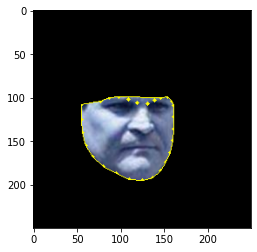

In [18]:

mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(np.bool)

out = np.zeros_like(img)
out[mask] = img[mask]

plt.imshow(out)